In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [230]:
ailabor_root = '/Users/sidsatya/dev/ailabor'
pwc_data = pd.read_csv(f'{ailabor_root}/ai_progress_metrics/data/pwc_progress_metrics.csv')
eff_data = pd.read_csv(f'{ailabor_root}/ai_progress_metrics/data/eff_progress_metrics.csv')

In [231]:
# Clean up the datasets

# 1. Convert the Date column to datetime format
pwc_data['Date'] = pd.to_datetime(pwc_data['Date'])
eff_data['Date'] = pd.to_datetime(eff_data['Date'])

# 2. Convert the Metric Performance column to numeric, forcing errors to NaN
pwc_data['Metric Performance'] = pd.to_numeric(pwc_data['Metric Performance'], errors='coerce')
eff_data['Metric Performance'] = pd.to_numeric(eff_data['Metric Performance'], errors='coerce')

# 3. Drop any rows with a null Date or Metric Performance
pwc_data = pwc_data.dropna(subset=['Date', 'Metric Performance'])
eff_data = eff_data.dropna(subset=['Date', 'Metric Performance'])

# 4. Drop the Unnamed column from pwc
pwc_data = pwc_data.drop(columns=['Unnamed: 10'], errors='ignore')


In [232]:
pwc_data.head()

,FeltenDim,Subfield,Topic,Subtask,Dataset,Metric,Model,Metric Performance,Date,EFF Title
0,Image Recognition,Medical,10-shot image generation,Semantic Segmentation,ADE20K,Mean IoU,ViT-P (InternImage-H),0.636,2025-05-26,NaN
1,Image Recognition,Medical,10-shot image generation,Semantic Segmentation,ADE20K,Mean IoU,ONE-PEACE,0.630,2023-05-18,NaN
2,Image Recognition,Medical,10-shot image generation,Semantic Segmentation,ADE20K,Mean IoU,InternImage-H,0.629,2022-11-10,NaN
3,Image Recognition,Medical,10-shot image generation,Semantic Segmentation,ADE20K,Mean IoU,M3I Pre-training (InternImage-H),0.629,2022-11-17,NaN
4,Image Recognition,Medical,10-shot image generation,Semantic Segmentation,ADE20K,Mean IoU,BEiT-3,0.628,2022-08-22,NaN


In [233]:
eff_data.head()

,FeltenDim,Problem,Subproblem,Dataset,Title,Metric,Date,Algorithm,Metric Performance,Source
0,Image Recognition,Vision,Image Recognition,CIFAR-10,CIFAR-10 Image Recognition,Percentage Correct,2011-07-01,An Analysis of Single-Layer Networks in Unsupe...,79.60,An Analysis of Single-Layer Networks in Unsupe...
1,Image Recognition,Vision,Image Recognition,CIFAR-10,CIFAR-10 Image Recognition,Percentage Correct,2011-07-01,Hierarchical Kernel Descriptors,80.00,Object Recognition with Hierarchical Kernel De...
2,Image Recognition,Vision,Image Recognition,CIFAR-10,CIFAR-10 Image Recognition,Percentage Correct,2012-06-16,MCDNN,88.79,Multi-Column Deep Neural Networks for Image Cl...
3,Image Recognition,Vision,Image Recognition,CIFAR-10,CIFAR-10 Image Recognition,Percentage Correct,2012-06-26,Local Transformations,82.20,Learning Invariant Representations with Local ...
4,Image Recognition,Vision,Image Recognition,CIFAR-10,CIFAR-10 Image Recognition,Percentage Correct,2012-07-03,Improving neural networks by preventing co-ada...,84.40,Improving neural networks by preventing co-ada...


In [234]:
# Remap metrics in pwc data and eff data
print("Unique metrics in PWC data before remapping: \n", pwc_data['Metric'].unique())
print("Unique metrics in Eff data before remapping: \n", eff_data['Metric'].unique())

metric_consistency_mapping = {
    'Mean IoU': 'mIoU', 
    'FID': 'FID',
    'mAP': 'mAP/AP',
    'AP': 'mAP/AP',
    'Avg. SDR': 'mSDR',
    'Micro-F1': 'F1/Micro-F1',
    'Perplexity': 'Perplexity',
    'Bit Per Character (BPC)': 'BPC',
    'Bits Per Byte': 'BPB',
    'Accuracy': 'Accuracy',
    'PPL': 'Perplexity',
    'Mean DICE': 'mDICE',
    'Exact Match': 'EM',
    'Word Error Rate (WER)': 'WER',
    'Percentage Error': 'Percentage Error',
    'BLEU Score': 'BLEU',
    'Mean Human Normalized Score': 'mHScore',
    'Score': 'Raw Score',
    'AUC': 'AUC',
    'Error Ratio': 'Error Ratio',
    'Percentage Correct': 'Accuracy',
    'ELO': 'ELO',
    'Top 1 Error': 'Top1Error',
    'Top 5 Error': 'Error',
    'Accuracy (trained on 10K)': 'Accuracy',
    'Accuracy (trained on 1K)': 'Accuracy',
    'EM': 'EM',
    'F1': 'F1/Micro-F1',
    'Error': 'Error',
    'Raw Score': 'Raw Score',
    'Model Entropy': 'Model Entropy',
    'BLEU': 'BLEU'
}

pwc_data['Mapped Metric'] = pwc_data['Metric'].map(metric_consistency_mapping)
eff_data['Mapped Metric'] = eff_data['Metric'].map(metric_consistency_mapping)

print("#"*25, " Applying Mapping ", "#"*25)
print("Unique metrics in PWC data after remapping: \n", pwc_data['Mapped Metric'].unique())
print("Unique metrics in EFF data after remapping: \n", eff_data['Mapped Metric'].unique())

Unique metrics in PWC data before remapping: 
 ['Mean IoU' 'FID' 'mAP' 'AP' 'Avg. SDR' 'Micro-F1' 'Perplexity'
 'Bit Per Character (BPC)' 'Bits Per Byte' 'Accuracy' 'PPL' 'Mean DICE'
 'Exact Match' 'Word Error Rate (WER)' 'Percentage Error' 'BLEU Score'
 'Score' 'AUC' 'Error Ratio' 'Percentage Correct' 'ELO' 'Top 1 Error'
 'Top 5 Error' 'Accuracy (trained on 10K)' 'EM' 'F1']
Unique metrics in Eff data before remapping: 
 ['Percentage Correct' 'Error' 'Percentage Error' 'ELO' 'Raw Score'
 'Word Error Rate (WER)' 'Model Entropy' 'Perplexity' 'BLEU' 'EM' 'F1']
#########################  Applying Mapping  #########################
Unique metrics in PWC data after remapping: 
 ['mIoU' 'FID' 'mAP/AP' 'mSDR' 'F1/Micro-F1' 'Perplexity' 'BPC' 'BPB'
 'Accuracy' 'mDICE' 'EM' 'WER' 'Percentage Error' 'BLEU' 'Raw Score' 'AUC'
 'Error Ratio' 'ELO' 'Top1Error' 'Error']
Unique metrics in EFF data after remapping: 
 ['Accuracy' 'Error' 'Percentage Error' 'ELO' 'Raw Score' 'WER'
 'Model Entropy' 'Perple

In [235]:
pwc_data[pwc_data['Metric'].isna()]

,FeltenDim,Subfield,Topic,Subtask,Dataset,Metric,Model,Metric Performance,Date,EFF Title,Mapped Metric


In [236]:
# Merge the two datasets only for metrics that share the same Mapped Metric and Similar Datasets. 
merged_metric_dfs = []
unique_eff_titles = eff_data['Title'].unique()
pwc_metrics_that_were_merged = []
eff_metrics_that_were_merged = []
for title in unique_eff_titles: 
    eff_title_data = eff_data[eff_data['Title'] == title]
    eff_relevant_cols = eff_title_data[['FeltenDim', 'Title', 'Mapped Metric', 'Algorithm', 'Metric Performance', 'Date']].copy()
    eff_relevant_cols = eff_relevant_cols.rename(columns={'Title': 'Dataset', 'Algorithm': 'Model'})
    eff_relevant_cols['Source'] = 'EFF'

    pwc_title_data = pwc_data[pwc_data['EFF Title'] == title]

    if pwc_title_data.empty: 
        merged_metric_dfs.append(eff_relevant_cols)
        continue

    if pwc_title_data['Mapped Metric'].values[0] != eff_title_data['Mapped Metric'].values[0]: 
        print(f"Metric mismatch for title {title}: pwc metric {pwc_title_data['Mapped Metric'].values[0]}, eff metric {eff_title_data['Mapped Metric'].values[0]}")
        merged_metric_dfs.append(eff_relevant_cols)
        continue

    pwc_relevant_cols = pwc_title_data[['FeltenDim', 'Dataset', 'Mapped Metric', 'Model', 'Metric Performance', 'Date']].copy()
    pwc_relevant_cols['Source'] = 'PWC'


    # Vertically stack the two dataframes
    combined_data = pd.concat([pwc_relevant_cols, eff_relevant_cols], ignore_index=True)

    dataset_metric_pwc = pwc_title_data['Dataset'].values[0] + '-' + pwc_title_data['Mapped Metric'].values[0]
    dataset_metric_eff = eff_title_data['Title'].values[0] + '-' + eff_title_data['Mapped Metric'].values[0]
    pwc_metrics_that_were_merged.append(dataset_metric_pwc)
    eff_metrics_that_were_merged.append(dataset_metric_eff)
    merged_metric_dfs.append(combined_data)

print(f"There are a total of {len(merged_metric_dfs)} merged metric datasets across PWC and EFF.")


# Get PWC data that was not merged
pwc_data_not_merged = pwc_data.copy()
pwc_data_not_merged['dataset_metric'] = pwc_data_not_merged['Dataset'] + '-' + pwc_data_not_merged['Mapped Metric']
pwc_data_not_merged = pwc_data_not_merged[~pwc_data_not_merged['dataset_metric'].isin(pwc_metrics_that_were_merged)]

print(pwc_data_not_merged[pwc_data_not_merged['FeltenDim'] == 'Drug Discovery'].shape)

unmerged_metric_df_pwc = []
for dataset_metric in pwc_data_not_merged['dataset_metric'].unique():
    pwc_subset = pwc_data_not_merged[pwc_data_not_merged['dataset_metric'] == dataset_metric]
    pwc_relevant_cols = pwc_subset[['FeltenDim', 'Dataset', 'Mapped Metric', 'Model', 'Metric Performance', 'Date']].copy()
    pwc_relevant_cols['Source'] = 'PWC'
    unmerged_metric_df_pwc.append(pwc_relevant_cols)
    
    if pwc_subset.empty: 
        print(dataset_metric, "is empty, skipping...")

print(f"There are a total of {len(unmerged_metric_df_pwc)} unmerged metric datasets in PWC data.")

# Get EFF data that was not merged
eff_data_not_merged = eff_data.copy()
eff_data_not_merged['dataset_metric'] = eff_data_not_merged['Title'] + '-' + eff_data_not_merged['Mapped Metric']
eff_data_not_merged = eff_data_not_merged[~eff_data_not_merged['dataset_metric'].isin(eff_metrics_that_were_merged)]

unmerged_metric_df_eff = []
for dataset_metric in eff_data_not_merged['dataset_metric'].unique():
    eff_subset = eff_data_not_merged[eff_data_not_merged['dataset_metric'] == dataset_metric]
    eff_relevant_cols = eff_subset[['FeltenDim', 'Title', 'Mapped Metric', 'Algorithm', 'Metric Performance', 'Date']].copy()
    eff_relevant_cols = eff_relevant_cols.rename(columns={'Title': 'Dataset', 'Algorithm': 'Model'})
    eff_relevant_cols['Source'] = 'EFF'
    unmerged_metric_df_eff.append(eff_relevant_cols)

print(f"There are a total of {len(unmerged_metric_df_eff)} unmerged metric datasets in EFF data.")

Metric mismatch for title Imagenet Image Recognition: pwc metric Top1Error, eff metric Error
Metric mismatch for title Generative models of CIFAR-10 images: pwc metric FID, eff metric Model Entropy
Metric mismatch for title Hutter Prize (bits per character to encode English text): pwc metric BPC, eff metric Model Entropy
There are a total of 102 merged metric datasets across PWC and EFF.
(55, 12)
There are a total of 58 unmerged metric datasets in PWC data.
There are a total of 26 unmerged metric datasets in EFF data.


In [237]:
# Merge all the dataframes into one full metric list
# Merge all the dataframes into one full metric list
all_metric_dfs = merged_metric_dfs.copy()  # Create a copy to avoid modifying original
all_metric_dfs.extend(unmerged_metric_df_pwc)
all_metric_dfs.extend(unmerged_metric_df_eff)

print(f"Combined a total of {len(all_metric_dfs)} metric datasets from all sources.")

Combined a total of 186 metric datasets from all sources.


## Metric Rescaling

In [238]:
def rescale_metric(df, metric_str): 
    """
    Rescales metrics based on their type for consistent comparison.
    Handles division by zero and logs problematic values.
    """
    if df.empty or 'Metric Performance' not in df.columns:
        print(f"Empty dataframe or missing metrics for {metric_str}")
        return df
        
    # Create a copy to avoid modifying the original dataframe
    df = df.copy()
    df['rescaled_metric'] = None
    
    # Filter out rows with missing metric values
    valid_df = df[pd.notna(df['Metric Performance'])]
    if valid_df.empty:
        print(f"No valid metric values for {metric_str} in dataset {df['Dataset'].iloc[0]}")
        return df
    
    # Find data from earliest year
    min_year = valid_df['Date'].dt.year.min()
    min_year_data = valid_df[valid_df['Date'].dt.year == min_year]
    if min_year_data.empty:
        print(f"No data for earliest year for {metric_str} in {df['Dataset'].iloc[0]}")
        return df
    
    # For metrics where higher is better
    if metric_str in ['mIoU', 'mAP/AP', 'F1/Micro-F1', 'EM', 'BLEU', 'mDICE', 'AUC', 'mHScore', 'ELO', 'mSDR', 'Raw Score', 'Accuracy']: 
        # Handle negative values if it's Raw Score
        rescale_val = 0
        if metric_str == 'Raw Score': 
            min_val = valid_df['Metric Performance'].min()
            if min_val < 0: 
                rescale_val = -min_val + 0.0001  # Add a small buffer
        
        # Use maximum value from earliest year as base value (v_0)
        v_0 = min_year_data['Metric Performance'].max() + rescale_val
        
        if v_0 <= 0:
            print(f"WARNING: Base value {v_0} is zero or negative for {metric_str} in {df['Dataset'].iloc[0]}. Using 0.0001 instead.")
            v_0 = 0.0001  # Use a small positive value to avoid division by zero
        
        for idx, row in valid_df.iterrows():
            v_t = row['Metric Performance'] + rescale_val
            if v_t <= 0:
                print(f"WARNING: Value {v_t} (original: {row['Metric Performance']}) is zero or negative for {metric_str} in {df['Dataset'].iloc[0]}. Using 0.0001.")
                v_t = 0.0001

            v_t_prime = np.log(v_t / v_0)
            df.loc[idx, 'rescaled_metric'] = v_t_prime
            
    # For error metrics where lower is better (inverting the ratio to make improvements positive)
    elif metric_str in ['Error', 'Error Ratio', 'Top1Error', 'Top5Error', 'Percentage Error']:
        # Use minimum value from earliest year as base value (v_0)
        v_0 = min_year_data['Metric Performance'].min()
        if "MNIST" in df['Dataset'].iloc[0]: 
            print(f"WARNING: MNIST dataset detected for {metric_str}. v_0 is {v_0}")

        if (v_0 > 1 and v_0 <= 100) or metric_str == 'Percentage Error':  # Likely percentage, but not pct error
            v_0 = v_0 / 100
        
        if v_0 <= 0:
            print(f"WARNING: Base value {v_0} is zero or negative for {metric_str} in {df['Dataset'].iloc[0]}. Using 0.0001.")
            v_0 = 0.0001
        
        for idx, row in valid_df.iterrows():
            v_t = row['Metric Performance']
            if v_t > 1 and v_t <= 100 and metric_str != 'Percentage Error':  # Likely percentage
                v_t = v_t / 100
            
            if v_t <= 0:
                print(f"WARNING: Value {v_t} (original: {row['Metric Performance']}) is zero or negative for {metric_str} in {df['Dataset'].iloc[0]}. Using 0.0001.")
                v_t = 0.0001

            if metric_str == 'Percentage Error':
                v_t = v_t / 100
                
            v_t_prime = np.log(v_0 / v_t)  # Note the inversion (v_0/v_t) for error metrics
            df.loc[idx, 'rescaled_metric'] = v_t_prime
            
    # For other metrics where lower is better (e.g., perplexity)
    elif metric_str in ['Perplexity', 'BPC', 'BPB', 'FID', 'Model Entropy', 'WER']: 
        # Use minimum value from earliest year as base value (v_0)
        v_0 = min_year_data['Metric Performance'].min()
        
        if v_0 <= 0:
            print(f"WARNING: Base value {v_0} is zero or negative for {metric_str} in {df['Dataset'].iloc[0]}. Using 0.0001.")
            v_0 = 0.0001
        
        for idx, row in valid_df.iterrows():
            v_t = row['Metric Performance']
            if v_t <= 0:
                print(f"WARNING: Value {v_t} (original: {row['Metric Performance']}) is zero or negative for {metric_str} in {df['Dataset'].iloc[0]}. Using 0.0001.")
                v_t = 0.0001
                
            v_t_prime = np.log(v_0 / v_t)
            df.loc[idx, 'rescaled_metric'] = v_t_prime
    else:
        print(f"Unknown metric type: {metric_str} for dataset {df['Dataset'].iloc[0]}. No rescaling performed.")
        
    return df


In [239]:
all_metric_dfs[3].sort_values('Date')

,FeltenDim,Dataset,Mapped Metric,Model,Metric Performance,Date,Source
64,Image Recognition,MNIST handwritten digit recognition,Percentage Error,Shape contexts,0.63,2002-07-01,EFF
63,Image Recognition,MNIST handwritten digit recognition,Percentage Error,ISVM,0.56,2002-07-01,EFF
65,Image Recognition,MNIST handwritten digit recognition,Percentage Error,Best Practices for Convolutional Neural Networ...,0.40,2003-07-01,EFF
67,Image Recognition,MNIST handwritten digit recognition,Percentage Error,CNN,1.19,2003-07-01,EFF
66,Image Recognition,MNIST handwritten digit recognition,Percentage Error,CNN+Gabor Filters,0.68,2003-07-01,EFF
...,...,...,...,...,...,...,...
47,Image Recognition,MNIST,Percentage Error,Convolutional PMM (Parametric Matrix Model),1.01,2024-07-08,PWC
57,Image Recognition,MNIST,Percentage Error,PMM (Parametric Matrix Model),2.62,2024-07-08,PWC
31,Image Recognition,MNIST,Percentage Error,Neural Architecture Search (NAS)-enabled Convo...,0.50,2024-08-14,PWC
5,Image Recognition,MNIST,Percentage Error,R-ExplaiNet-22 (single model),0.20,2024-10-31,PWC


In [240]:
# Rescale the metrics in the merged dataframes
all_metric_dfs_rescaled = []
for idx, df in enumerate(all_metric_dfs):
    if len(df) == 0: 
        print(f"Empty dataframe at index {idx}. Skipping.")
        continue
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    metric_str = df['Mapped Metric'].values[0]
    rescaled_df = rescale_metric(df, metric_str)
    all_metric_dfs_rescaled.append(rescaled_df)

In [241]:
all_metric_dfs_rescaled[0]

,FeltenDim,Dataset,Mapped Metric,Model,Metric Performance,Date,Source,rescaled_metric
0,Image Recognition,CIFAR-10,Accuracy,ViT-H/14,99.50,2020-10-22,PWC,0.231976
1,Image Recognition,CIFAR-10,Accuracy,"DINOv2 (ViT-g/14, frozen model, linear eval)",99.50,2023-04-14,PWC,0.231976
2,Image Recognition,CIFAR-10,Accuracy,µ2Net (ViT-L/16),99.49,2022-05-25,PWC,0.231876
3,Image Recognition,CIFAR-10,Accuracy,ViT-L/16,99.42,2020-10-22,PWC,0.231172
4,Image Recognition,CIFAR-10,Accuracy,CaiT-M-36 U 224,99.40,2021-03-31,PWC,0.230971
...,...,...,...,...,...,...,...,...
310,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Neural Architecture Search,96.35,2017-02-15,EFF,0.199806
311,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Evolution,94.60,2017-04-22,EFF,0.181476
312,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Evolution ensemble,95.60,2017-04-22,EFF,0.191992
313,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Deep Complex,94.40,2017-05-30,EFF,0.17936


## Computing Frontier Curves
**Logic**: 
1. For each metric_df, for each year, compute the maximum rescaled metric. 
2. Set frontier_df = pd.Dataframe() with columns ['Date', 'rescaled_metric']
3. Starting from the minimum year, take the maximum metric. Set curr_frontier_val = this metric
4. For every subsequent year, if the maximum metric in that year is >= frontier val, append date and metric to frontier df and set curr_frontier_val to that metric. 
5. append a list [metric_df, fronter_df] to a master list.

In [242]:
# This list will hold pairs of [original_dataframe, frontier_dataframe]
frontier_data = []

for df in all_metric_dfs_rescaled:
    # Work on a copy to avoid modifying the original list of dataframes
    df_copy = df.copy()

    # Ensure 'rescaled_metric' is numeric and drop any rows where it's missing
    df_copy['rescaled_metric'] = pd.to_numeric(df_copy['rescaled_metric'], errors='coerce')
    df_copy.dropna(subset=['rescaled_metric', 'Date'], inplace=True)

    # If the dataframe is empty after cleaning, skip it
    if df_copy.empty:
        continue

    # Extract year for grouping
    df_copy['year'] = df_copy['Date'].dt.year

    # Find the best performing entry for each year
    yearly_max_metrics = df_copy.loc[df_copy.groupby('year')['rescaled_metric'].idxmax()]
    
    # If there are no metrics after grouping, skip
    if yearly_max_metrics.empty:
        continue

    # Calculate the frontier
    frontier_points = []
    current_max_frontier_val = -np.inf
    last_actual_frontier_row = None
    
    min_year = int(yearly_max_metrics['year'].min())
    max_year = int(yearly_max_metrics['year'].max())

    # Set year as index for quick lookup
    yearly_max_metrics.set_index('year', inplace=True)

    for year in range(min_year, max_year + 1):
        if year in yearly_max_metrics.index:
            # A record exists for this year
            row = yearly_max_metrics.loc[year]
            if row['rescaled_metric'] >= current_max_frontier_val:
                # New frontier point found
                frontier_points.append(row)
                current_max_frontier_val = row['rescaled_metric']
                last_actual_frontier_row = row
            else:
                # Not a new frontier, carry over the last frontier value
                if last_actual_frontier_row is not None:
                    new_point = last_actual_frontier_row.copy()
                    # Set the date to Jan 1st of the current year
                    new_point['Date'] = pd.to_datetime(f"{year}-01-01")
                    frontier_points.append(new_point)
        else:
            # No record for this year, carry over the last frontier value
            if last_actual_frontier_row is not None:
                new_point = last_actual_frontier_row.copy()
                new_point['Date'] = pd.to_datetime(f"{year}-01-01")
                frontier_points.append(new_point)

    # Create a dataframe for the frontier curve
    if frontier_points:
        frontier_df = pd.DataFrame(frontier_points)
    else:
        # If no frontier points were found, create an empty dataframe
        frontier_df = pd.DataFrame()

    # Append the original dataframe (without the temp 'year' column) and its frontier to the list
    frontier_data.append([df_copy.drop(columns=['year']), frontier_df])

print(f"Computed frontier curves for {len(frontier_data)} metric datasets.")

Computed frontier curves for 186 metric datasets.


In [243]:
frontier_data[0][0]

,FeltenDim,Dataset,Mapped Metric,Model,Metric Performance,Date,Source,rescaled_metric
0,Image Recognition,CIFAR-10,Accuracy,ViT-H/14,99.50,2020-10-22,PWC,0.231976
1,Image Recognition,CIFAR-10,Accuracy,"DINOv2 (ViT-g/14, frozen model, linear eval)",99.50,2023-04-14,PWC,0.231976
2,Image Recognition,CIFAR-10,Accuracy,µ2Net (ViT-L/16),99.49,2022-05-25,PWC,0.231876
3,Image Recognition,CIFAR-10,Accuracy,ViT-L/16,99.42,2020-10-22,PWC,0.231172
4,Image Recognition,CIFAR-10,Accuracy,CaiT-M-36 U 224,99.40,2021-03-31,PWC,0.230971
...,...,...,...,...,...,...,...,...
310,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Neural Architecture Search,96.35,2017-02-15,EFF,0.199806
311,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Evolution,94.60,2017-04-22,EFF,0.181476
312,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Evolution ensemble,95.60,2017-04-22,EFF,0.191992
313,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Deep Complex,94.40,2017-05-30,EFF,0.179360


In [244]:
frontier_data[0][1]

,FeltenDim,Dataset,Mapped Metric,Model,Metric Performance,Date,Source,rescaled_metric
2010,Image Recognition,CIFAR-10,Accuracy,Convolutional Deep Belief Network,78.90,2010-08-01,PWC,0.000000
2011,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Hierarchical Kernel Descriptors,80.00,2011-07-01,EFF,0.013845
2012,Image Recognition,CIFAR-10,Accuracy,GP EI,90.50,2012-06-13,PWC,0.137169
2013,Image Recognition,CIFAR-10,Accuracy,Network in Network,91.20,2013-12-16,PWC,0.144874
2014,Image Recognition,CIFAR-10,Accuracy,Fractional MP,96.50,2014-12-18,PWC,0.201362
2015,Image Recognition,CIFAR-10 Image Recognition,Accuracy,Fractional MP,96.53,2015-02-28,EFF,0.201673
2016,Image Recognition,CIFAR-10,Accuracy,Deep pyramidal residual network,96.69,2016-10-10,PWC,0.203329
2017,Image Recognition,CIFAR-10,Accuracy,SENet + ShakeShake + Cutout,97.88,2017-09-05,PWC,0.215561
2018,Image Recognition,CIFAR-10,Accuracy,GPIPE + transfer learning,99.00,2018-11-16,PWC,0.226939
2019,Image Recognition,CIFAR-10,Accuracy,BiT-L (ResNet),99.37,2019-12-24,PWC,0.230669


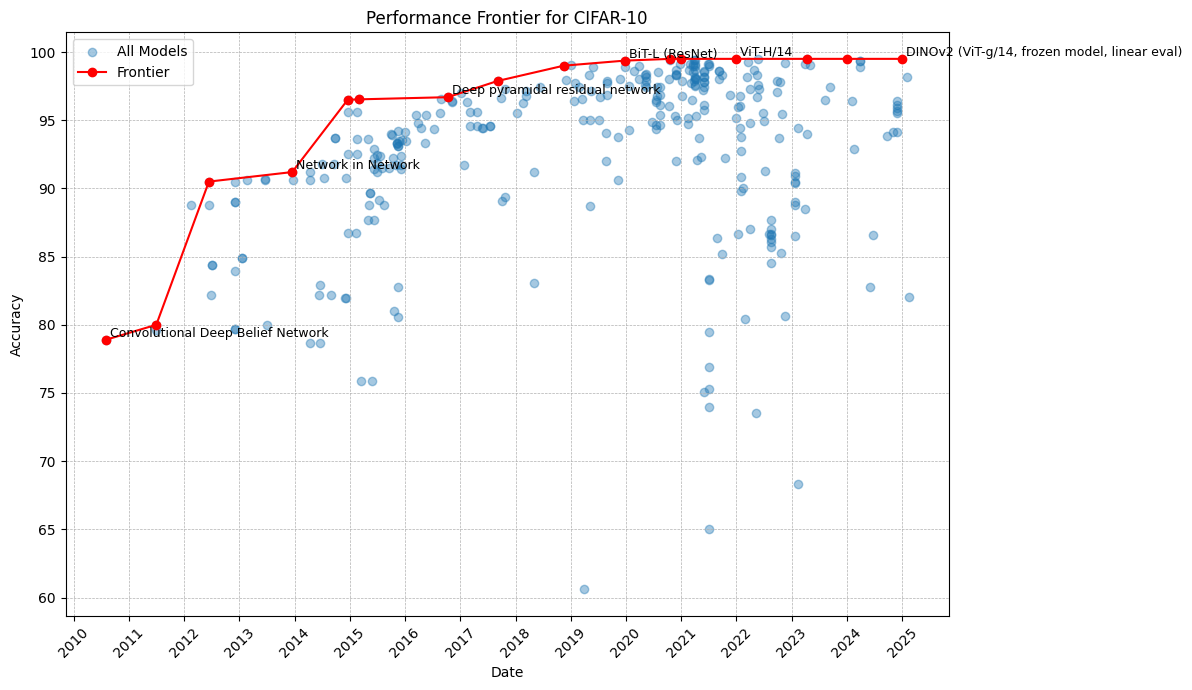

Finished saving metric 1/186 plot for dataset CIFAR-10 with metric Accuracy.


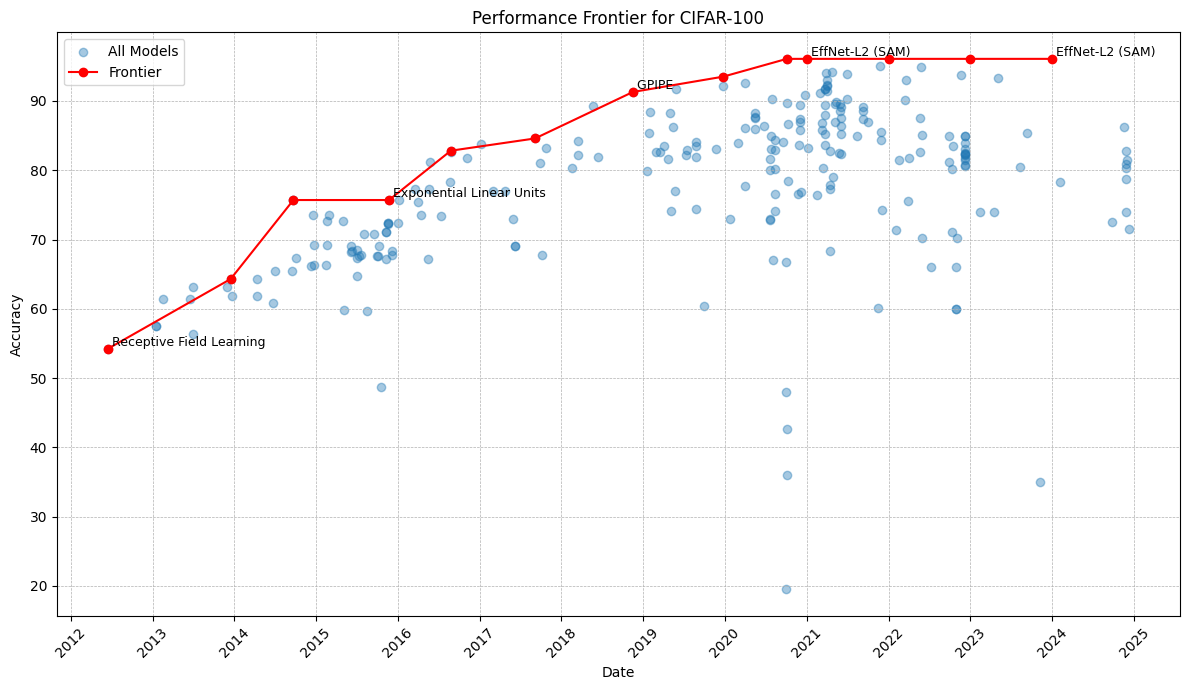

Finished saving metric 2/186 plot for dataset CIFAR-100 with metric Accuracy.


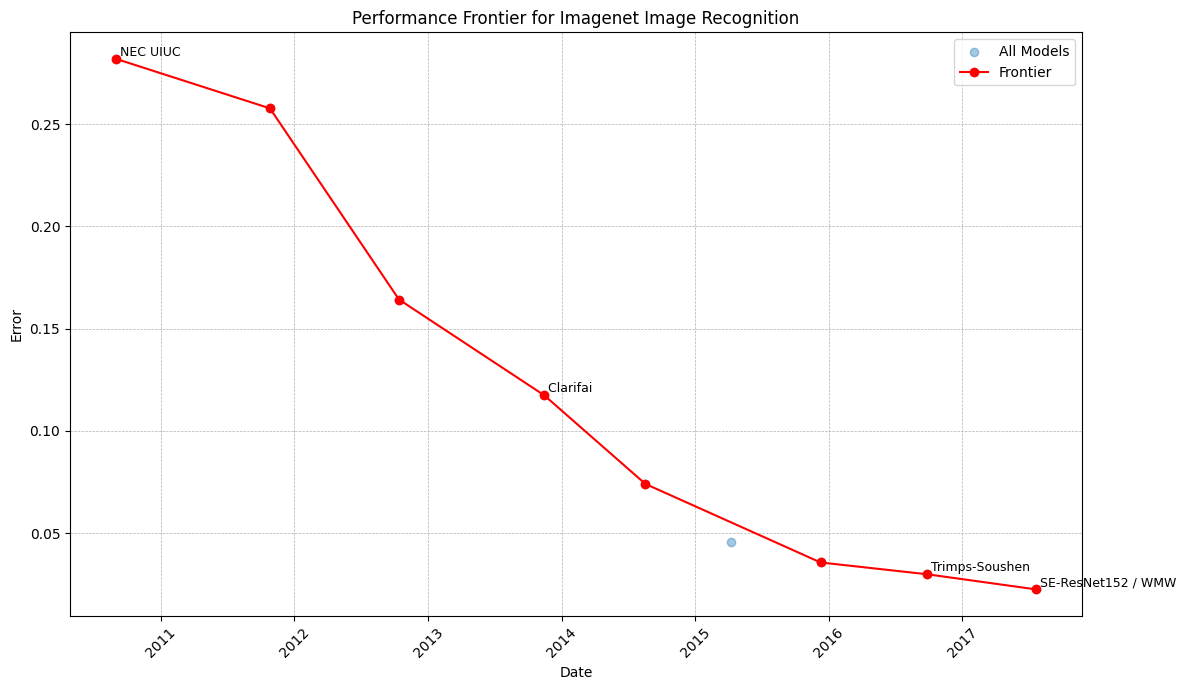

Finished saving metric 3/186 plot for dataset Imagenet Image Recognition with metric Error.
Finished saving metric 4/186 plot for dataset MNIST with metric Percentage Error.
Finished saving metric 5/186 plot for dataset MSRC-21 image semantic labelling (per-class) with metric Accuracy.
Finished saving metric 6/186 plot for dataset MSRC-21 image semantic labelling (per-pixel) with metric Accuracy.
Finished saving metric 7/186 plot for dataset STL-10 with metric Accuracy.
Finished saving metric 8/186 plot for dataset Street House View Numbers (SVHN) with metric Percentage Error.
Finished saving metric 9/186 plot for dataset COCO Visual Question Answering (VQA) abstract 1.0 multiple choice with metric Accuracy.
Finished saving metric 10/186 plot for dataset COCO Visual Question Answering (VQA) abstract images 1.0 open ended with metric Accuracy.
Finished saving metric 11/186 plot for dataset COCO Visual Question Answering (VQA) real images 1.0 multiple choice with metric Accuracy.
Finishe

/var/folders/y2/820f0d093ps3xgsy472nf3zc0000gn/T/ipykernel_20845/2055839620.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Finished saving metric 74/186 plot for dataset Word error rate on Switchboard trained against the Hub5'00 dataset with metric Percentage Error.
Finished saving metric 75/186 plot for dataset CHiME clean with metric Percentage Error.
Finished saving metric 76/186 plot for dataset chime real with metric Percentage Error.
Finished saving metric 77/186 plot for dataset fisher WER with metric WER.
Finished saving metric 78/186 plot for dataset LibriSpeech test-clean with metric WER.
Finished saving metric 79/186 plot for dataset LibriSpeech test-other with metric WER.
Finished saving metric 80/186 plot for dataset swb_hub_500 WER full SWBCH with metric WER.
Finished saving metric 81/186 plot for dataset TIMIT with metric Percentage Error.
Finished saving metric 82/186 plot for dataset WSJ eval92 with metric WER.
Finished saving metric 83/186 plot for dataset WSJ eval93 with metric WER.
Finished saving metric 84/186 plot for dataset Precision of Instrumentals detection reached when tested on

) missing from font(s) DejaVu Sans.nf3zc0000gn/T/ipykernel_20845/2055839620.py:52: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.nf3zc0000gn/T/ipykernel_20845/2055839620.py:60: UserWarning: Glyph 13 (
  plt.savefig(f'{ailabor_root}/ai_progress_metrics/figs/{filename}', dpi=300)


Finished saving metric 115/186 plot for dataset COCO-O with metric mAP/AP.
Finished saving metric 116/186 plot for dataset MUSDB18 with metric mSDR.
Finished saving metric 117/186 plot for dataset MUSDB18-HQ with metric mSDR.
Finished saving metric 118/186 plot for dataset MIMIC-III with metric F1/Micro-F1.
Finished saving metric 119/186 plot for dataset WikiText-103 with metric Perplexity.
Finished saving metric 120/186 plot for dataset enwik8 with metric BPC.
Finished saving metric 121/186 plot for dataset The Pile with metric BPB.
Finished saving metric 122/186 plot for dataset WikiText-2 with metric Perplexity.
Finished saving metric 123/186 plot for dataset One Billion Word with metric Perplexity.
Finished saving metric 124/186 plot for dataset Penn Treebank (Character Level) with metric BPC.
Finished saving metric 125/186 plot for dataset Hutter Prize with metric BPC.
Finished saving metric 126/186 plot for dataset Kvasir-SEG with metric mDICE.
Finished saving metric 127/186 plot

/var/folders/y2/820f0d093ps3xgsy472nf3zc0000gn/T/ipykernel_20845/2055839620.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


Finished saving metric 173/186 plot for dataset Word error rate on Switchboard trained against the Hub5'00 dataset with metric Percentage Error.
Finished saving metric 174/186 plot for dataset chime real with metric Percentage Error.
Finished saving metric 175/186 plot for dataset fisher WER with metric WER.
Finished saving metric 176/186 plot for dataset Precision of Instrumentals detection reached when tested on SATIN (Bayle et al. 2017) with metric Accuracy.
Finished saving metric 177/186 plot for dataset Generative models of CIFAR-10 images with metric Model Entropy.
Finished saving metric 178/186 plot for dataset Hutter Prize (bits per character to encode English text) with metric Model Entropy.
Finished saving metric 179/186 plot for dataset The Loebner Prize scored selection answers with metric Accuracy.
Finished saving metric 180/186 plot for dataset CNN Comprehension test with metric Accuracy.
Finished saving metric 181/186 plot for dataset Daily Mail Comprehension test with m

In [245]:
# Using enumerate to get the index of each plot
for idx, df_pair in enumerate(frontier_data):
    # Define the dataframes from the frontier_data list
    df = df_pair[0].copy()
    df_frontier = df_pair[1].copy()

    # If the frontier dataframe is empty, skip to the next pair
    if df_frontier.empty:
        continue

    # Ensure the 'Date' columns are in datetime format for plotting
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df_frontier['Date'] = pd.to_datetime(df_frontier['Date'], errors='coerce')
    
    # Sort frontier by date to ensure the line plot is correct
    df_frontier.sort_values('Date', inplace=True)

    # Create the plot
    plt.figure(figsize=(12, 7))

    # Plot all the data points as a scatter plot
    plt.scatter(df['Date'], df['Metric Performance'], alpha=0.4, label='All Models')

    # Plot the frontier points with a line connecting them
    plt.plot(df_frontier['Date'], df_frontier['Metric Performance'], marker='o', linestyle='-', color='red', label='Frontier')

    # Determine the min and max years for labeling
    min_year = df_frontier['Date'].dt.year.min()
    max_year = df_frontier['Date'].dt.year.max()

    # Add text labels for specific model names on the frontier points
    for _, row in df_frontier.iterrows():
        current_year = row['Date'].year
        # Label the first, last, and every 3rd year's frontier point
        if (current_year == min_year or
            current_year == max_year or
            (current_year - min_year) % 3 == 0):
            plt.text(row['Date'], row['Metric Performance'], ' ' + str(row['Model']), fontsize=9, va='bottom', ha='left')

    # Set plot labels and title
    plt.xlabel('Date')
    plt.ylabel(df['Mapped Metric'].values[0])
    plt.title(f"Performance Frontier for {df['Dataset'].values[0]}")
    plt.legend()

    # Format the x-axis to show years clearly
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    
    # Sanitize dataset and metric names for the filename
    dataset_name = df['Dataset'].values[0].replace('/', '_').replace(':', '_')
    metric_name = df['Mapped Metric'].values[0].replace('/', '_').replace(':', '_')
    filename = f"{dataset_name}_{metric_name}_frontier_plot.png"
    
    # Save the plot to a file 
    plt.savefig(f'{ailabor_root}/ai_progress_metrics/figs/{filename}', dpi=300)
    
    # Only show the first 3 plots
    if idx < 3:
        plt.show()
    
    # Close the plot to free up memory and prevent it from being displayed later
    plt.close()
    
    print(f"Finished saving metric {idx + 1}/{len(frontier_data)} plot for dataset {df['Dataset'].values[0]} with metric {df['Mapped Metric'].values[0]}.")

## Compute frontier slopes and analyze Felten Dimensions

In [246]:
for dim in pwc_data['FeltenDim'].unique():
   print(dim)

Image Recognition
Image Generation
Instrumental Track Recognition
Language Modeling
Reading Comprehension
Speech Recognition
Translation
Real-Time Video Games
Visual QA
Drug Discovery
Abstract Strategy Games


In [247]:
# each dict elem will contain a list of dataset indices, a dict for slopes in each year, last value is the overall slope
felten_dict = {
    'Image Recognition': [[],{}, []],
    'Image Generation': [[],{}, []],
    'Instrumental Track Recognition': [[],{}, []],
    'Language Modeling': [[],{},[]],
    'Reading Comprehension': [[],{},[]],
    'Speech Recognition': [[],{},[]],
    'Translation': [[],{},[]],
    'Real-Time Video Games': [[],{},[]],
    'Visual QA': [[],{},[]],
    'Drug Discovery': [[],{},[]],
    'Abstract Strategy Games': [[],{},[]]
}

for idx, df_pair in enumerate(frontier_data):
    df = df_pair[0].copy()
    df_frontier = df_pair[1].copy()

    # If the frontier dataframe is empty, skip to the next pair
    if df_frontier.empty:
        continue

    # Get the FeltenDim for this dataset
    felten_dim = df['FeltenDim'].values[0]

    # If this dimension is not in the dictionary, initialize it
    if felten_dim not in felten_dict:
        felten_dict[felten_dim] = [[], {}]

    # Add the index of this dataset to the list for this dimension
    felten_dict[felten_dim][0].append(idx)

    # Calculate slopes for each year in the frontier
    for i in range(1, len(df_frontier)):
        year = int(df_frontier['Date'].dt.year.iloc[i])
        if year not in felten_dict[felten_dim][1]:
            felten_dict[felten_dim][1][year] = []
        
        slope = float((df_frontier['rescaled_metric'].iloc[i] - df_frontier['rescaled_metric'].iloc[i-1]) / \
                (df_frontier['Date'].dt.year.iloc[i] - df_frontier['Date'].dt.year.iloc[i-1]))
        felten_dict[felten_dim][1][year].append(slope)
    
    # Calculate slope from min year to max year
    min_year = df_frontier['Date'].dt.year.min()
    max_year = df_frontier['Date'].dt.year.max()
    if min_year != max_year:
        overall_slope = float((df_frontier['rescaled_metric'].iloc[-1] - df_frontier['rescaled_metric'].iloc[0]) / \
                              (max_year - min_year))
        felten_dict[felten_dim][2].append(overall_slope)
    else:
        felten_dict[felten_dim][2].append(0.0)


In [248]:
for dim in felten_dict.keys():
    print(f"Dimension: {dim}")
    print(f"# of corresponding metrics: {len(felten_dict[dim][0])}")
    print("-" * 40) 

Dimension: Image Recognition
# of corresponding metrics: 28
----------------------------------------
Dimension: Image Generation
# of corresponding metrics: 6
----------------------------------------
Dimension: Instrumental Track Recognition
# of corresponding metrics: 4
----------------------------------------
Dimension: Language Modeling
# of corresponding metrics: 11
----------------------------------------
Dimension: Reading Comprehension
# of corresponding metrics: 24
----------------------------------------
Dimension: Speech Recognition
# of corresponding metrics: 16
----------------------------------------
Dimension: Translation
# of corresponding metrics: 7
----------------------------------------
Dimension: Real-Time Video Games
# of corresponding metrics: 63
----------------------------------------
Dimension: Visual QA
# of corresponding metrics: 17
----------------------------------------
Dimension: Drug Discovery
# of corresponding metrics: 8
-------------------------------

In [249]:
year_dim_avg_slopes = {}
for dim, (indices, slopes, overall_slope) in felten_dict.items():
    for year, slope_list in slopes.items():
        if year not in year_dim_avg_slopes:
            year_dim_avg_slopes[year] = {}
        if dim not in year_dim_avg_slopes[year]:
            year_dim_avg_slopes[year][dim] = []
        year_dim_avg_slopes[year][dim].extend(slope_list)
# Calculate average slopes for each year and dimension
for year, dim_slopes in year_dim_avg_slopes.items():
    for dim, slopes in dim_slopes.items():
        if slopes:  # Check if there are any slopes to average
            avg_slope = np.mean(slopes)
            year_dim_avg_slopes[year][dim] = avg_slope
        else:
            year_dim_avg_slopes[year][dim] = None  # No data for this dimension in this year
# Convert the dictionary to a DataFrame for easier plotting
year_dim_avg_slopes_df = pd.DataFrame.from_dict(year_dim_avg_slopes, orient='index')
year_dim_avg_slopes_df.index = pd.to_datetime(year_dim_avg_slopes_df.index, format='%Y')
year_dim_avg_slopes_df.sort_index(inplace=True)

In [250]:
year_dim_avg_slopes_df.fillna(0, inplace=True)  # Fill NaN values with 0 for plotting
year_dim_avg_slopes_df.to_csv(f'{ailabor_root}/ai_progress_metrics/data/year_dim_avg_slopes.csv')
year_dim_avg_slopes_df.head()

,Image Recognition,Speech Recognition,Abstract Strategy Games,Language Modeling,Reading Comprehension,Real-Time Video Games,Instrumental Track Recognition,Image Generation,Translation,Visual QA,Drug Discovery
1985-01-01,0.0,0.0,0.113482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986-01-01,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987-01-01,0.0,0.0,0.051211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988-01-01,0.0,0.0,0.035755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989-01-01,0.0,0.0,0.016916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
# Compute average overall slope
overall_slopes = {}
for dim, (indices, slopes, overall_slope) in felten_dict.items():
    overall_slopes[dim] = np.mean(overall_slope) if overall_slope else 0.0 
overall_slopes_df = pd.DataFrame.from_dict(overall_slopes, orient='index', columns=['Overall Slope'])
overall_slopes_df.index.name = 'Felten Dimension'
overall_slopes_df.reset_index(inplace=True)
overall_slopes_df.to_csv(f'{ailabor_root}/ai_progress_metrics/data/overall_slopes.csv', index=False)
overall_slopes_df

,Felten Dimension,Overall Slope
0,Image Recognition,0.104584
1,Image Generation,0.348742
2,Instrumental Track Recognition,0.251157
3,Language Modeling,0.115923
4,Reading Comprehension,0.043458
5,Speech Recognition,0.281429
6,Translation,0.039700
7,Real-Time Video Games,0.302149
8,Visual QA,0.055084
9,Drug Discovery,0.012708
